## Phase 2: Apply Supervised Learning for Product Recommendation in Glowlytic

In this project, we aim to develop a **supervised learning-based recommendation system** that suggests the best product type based on user attributes, such as **skin type, product brand, and notable effects.** The goal is to improve personalized recommendations by leveraging machine learning techniques.

### Why Supervised Learning?
Supervised learning is a machine learning approach where a model learns from labeled data. Given an input (e.g., user attributes), the model predicts an output (e.g., product category). We experimented with **two supervised learning models**:

- **Support Vector Machine (SVM)** – A powerful classification algorithm that finds the optimal decision boundary.
- **CatBoost Classifier** – A gradient boosting algorithm optimized for categorical data.

Each model is evaluated based on **accuracy, precision, recall, and F1-score.**  
The following sections provide an in-depth analysis of these models, starting with **Support Vector Machine (SVM).**




## 1-Support Vector Machine (SVM)

Support Vector Machine (SVM) is one of the most notable supervised machine learning algorithms, it was designed to classify data by finding the most ideal boundary between different attributes. Unlike some other models that might get distracted by noise or additional details, SVM focuses on the most important data points which are the ones that are closest to the boundary to ensure that the systems decisions are made in a clear and precise way. By maximizing the margin between categories, SVM improves accuracy and make classification task reliable [1].

### Justification

We chose to implement SVM because of the following reasons [2]: 

1.	The Glowlytic recommendation system takes into consideration multiple attributes, including skin type, product type, brand, and notable effects. Also, SVM’s ability to work well in high-dimensional spaces makes sure that all these factors are taken into account for accurate recommendations.

2.	Since our system relies on a curated datasets, instaed of massive amount of data, SVM makes an ideal choice. It promises high accuracy even with a smaller dataset, and outperforms other models that need extensive training data to be effective.

3.	Unlike models that may struggle with new inputs, SVM has balance by having clear decision boundaries. This makes it have less tendency to overfit  and ensures that recommendations remain the same across different users.


SVM Accuracy: 0.60
Precision: 0.61
Recall: 0.60
F1-score: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.45      0.55        40
           1       0.46      0.41      0.44        41
           2       0.59      0.73      0.65        79
           3       0.85      0.81      0.83        42
           4       0.46      0.47      0.47        40

    accuracy                           0.60       242
   macro avg       0.62      0.58      0.59       242
weighted avg       0.61      0.60      0.60       242



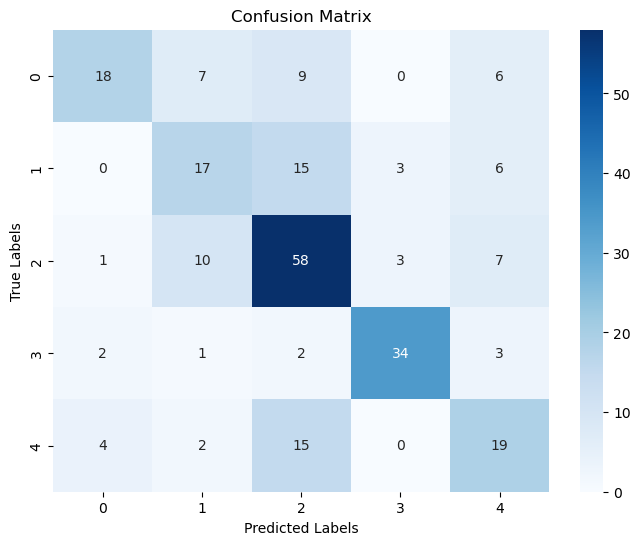

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
)
from sklearn.svm import SVC

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# ============================================
# FEATURE ENGINEERING & PREPROCESSING

# Encoding categorical features:
# The 'brand' column is categorical, so we apply one-hot encoding to convert it into numerical format.
X = df[['brand']].copy()
X = pd.get_dummies(X, columns=['brand'])

# Adding binary-encoded columns for notable effects and skin type:
# These are categorical variables already stored in binary format (0 or 1), so we directly include them in X.
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Extracting target variable (product type labels):
# The 'product_type' column is stored in one-hot encoded format. We convert it back to single labels.
product_type_columns = [col for col in df.columns if col.startswith('product_type_')]
y = df[product_type_columns].values.argmax(axis=1)  # Convert one-hot encoding to single labels

# ============================================
# SPLITTING DATA INTO TRAINING & TESTING SETS

# We split the dataset into 80% training and 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ============================================
# TRAINING SUPPORT VECTOR MACHINE (SVM)
# Initializing the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Training the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# ============================================
# Making predictions
# Predicting product type on the test set
y_pred = svm_classifier.predict(X_test)

# ============================================
# EVALUATION

# Computing evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print results
print(f'SVM Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Printing a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ============================================
# CONFUSION MATRIX VISUALIZATION

# Creating a confusion matrix to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## 2-CatBoost Classifier

CatBoost (Categorical Boosting) is a high performance gradient boosting algorithm developed by Yandex. It is designed to handle categorical features efficiently without requiring extensive preprocessing, making it ideal for classification tasks with structured data. Unlike traditional gradient boosting models, CatBoost utilizes an advanced technique called ordered boosting to prevent overfitting and enhance generalization, making it a powerful choice for recommendation systems [3].

### Justification
We chose to implement CatBoost for the following reasons [4]:

1. Optimized Handling of Categorical Data
The Glowlytic recommendation system relies heavily on categorical attributes such as brand, product type, skin type, and notable effects. CatBoost natively supports categorical features without requiring extensive preprocessing like one-hot encoding, preserving data structure and improving efficiency.

2. Superior Performance on Imbalanced Data
Many real world datasets, including ours, exhibit class imbalances where some product types may be more common than others. CatBoost incorporates ordered boosting and feature combinations, reducing overfitting and improving accuracy, even when dealing with underrepresented product categories.

3. Efficiency and Faster Training Compared to Other Boosting Models
Unlike traditional boosting algorithms (such as XGBoost or LightGBM), CatBoost is optimized for speed and can handle large datasets efficiently. It reduces training time without compromising accuracy by implementing symmetric trees and advanced loss functions, making it an ideal choice for our recommendation system.

4. Robust Generalization and High Accuracy
The Glowlytic system needs a model that performs well across different user queries while maintaining high accuracy in predicting the best product recommendations. CatBoost reduces the risk of overfitting while ensuring the model generalizes well to unseen data, making it a reliable choice for providing consistent recommendations.

By leveraging CatBoost, our system can efficiently process large scale categorical data, improve classification accuracy, and provide more personalized and precise product recommendations to users based on their skin type, brand preferences, and desired product effects.



CatBoost Accuracy: 0.61
Precision: 0.61
Recall: 0.61
F1-score: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        40
           1       0.45      0.37      0.41        41
           2       0.61      0.76      0.67        79
           3       0.85      0.79      0.81        42
           4       0.44      0.47      0.46        40

    accuracy                           0.61       242
   macro avg       0.61      0.58      0.59       242
weighted avg       0.61      0.61      0.60       242



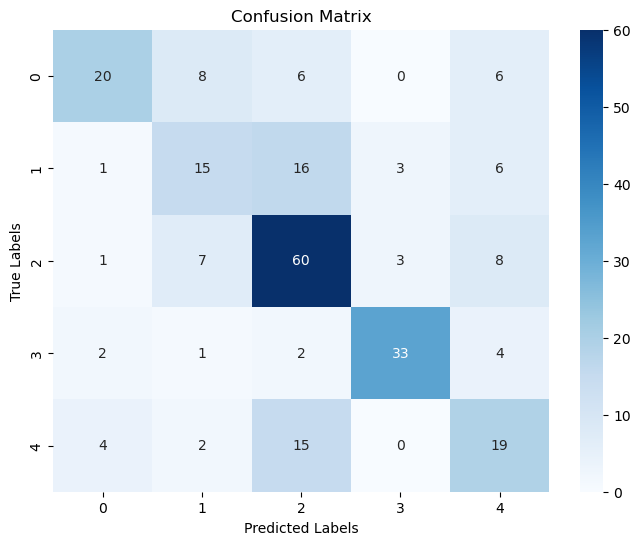

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.metrics import precision_recall_fscore_support


# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# ============================================
# FEATURE ENGINEERING & PREPROCESSING 

# Encoding categorical features: 
# The 'brand' column is categorical, so we apply one-hot encoding to convert it into numerical format.
X = df[['brand']].copy()
X = pd.get_dummies(X, columns=['brand'])

# Adding binary-encoded columns for skin type and notable effects
# These features are already represented as binary (0 or 1), so we directly include them in X.
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding the target variable:
# 'product_type' is categorical, so we convert it into numerical labels using Label Encoding.
y = LabelEncoder().fit_transform(df['product_type'].astype(str))

# ============================================
# TRAINING & TESTING SPLIT

# Splitting the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ============================================
# TRAINING CATBOOST CLASSIFIER

# Initializing CatBoost Classifier with tuned hyperparameters:
catboost_classifier = CatBoostClassifier(
    iterations=2000,  # Increase iterations for better learning
    depth=8,  # Controls the complexity of the trees
    learning_rate=0.05,  # Lower learning rate with more iterations
    l2_leaf_reg=3,  # Regularization to prevent overfitting
    loss_function='MultiClass',
    random_seed=42, # Ensures consistent results across runs
    eval_metric="Accuracy",
    verbose=0
)

# Training the model using training data
catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, use_best_model=True)

# ============================================
# Making predictions
# Predicting product type on the test set
y_pred = catboost_classifier.predict(X_test)

# ============================================
# EVALUATION

# Computing evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f'CatBoost Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}\n')

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ============================================
# CONFUSION MATRIX VISUALIZATION

# Creating a confusion matrix to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

 ## Comparision

 Both CatBoost and SVM algorithms performed similarly on the dataset, with CatBoost achieving a slightly better accuracy of 61% compared to SVM's 60%. 


 #### Classification Report Analysis

 | Class Label | CatBoost Precision | SVM Precision | CatBoost Recall | SVM Recall | Key Observation |
|------------|-------------------|-------------|--------------|------------|----------------|
| **0** | 0.71 | 0.72 | 0.50 | 0.45 | CatBoost has better recall, meaning it captures more relevant samples. |
| **1** | 0.45 | 0.46 | 0.37 | 0.41 | Both models struggle to classify this category accurately. |
| **2** | 0.61 | 0.59 | 0.76 | 0.73 | CatBoost shows slightly better precision and recall; meaning it captures more actual positives across classes. |
| **3** | 0.85 | 0.85 | 0.79 | 0.81 | Both models perform equally well for this category. |
| **4** | 0.44 | 0.46 | 0.47 | 0.47 | Very similar performance, showing a challenge in classifying this category. |

CatBoost Confusion Matrix

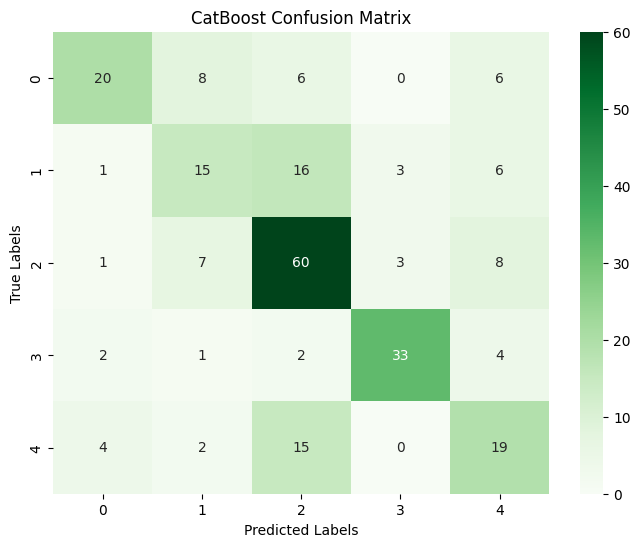

SVM Confusion Matrix

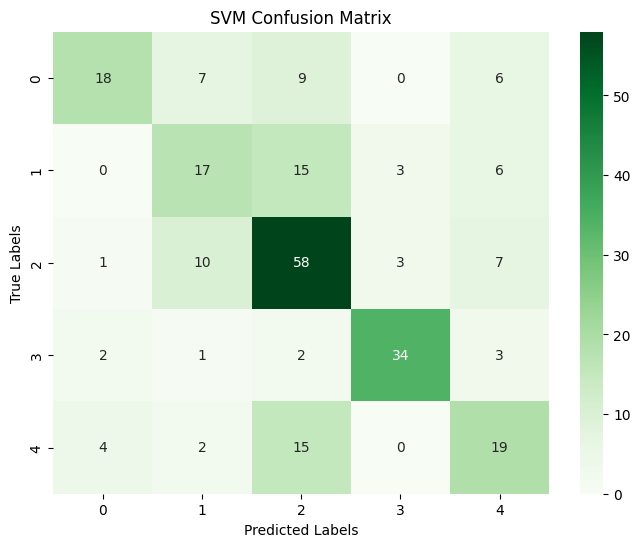

Based on the comparison of the confusion matrices, CatBoost generally performs better than SVM in terms of accuracy and misclassification rate. CatBoost correctly classifies more samples overall, with a notable advantage in Class 2, where it achieves 60 correct classifications compared to SVM’s 58. For Class 3, however, SVM slightly outperforms CatBoost with 34 correct classifications versus 33. When analyzing misclassification rates, CatBoost exhibits a more balanced distribution of errors, making it a more robust model for generalization. SVM, on the other hand, tends to have higher variance and misclassifies more samples, particularly in Class 1, where it has 10 errors compared to CatBoost’s 7. While SVM performs well for specific cases like Class 3, its overall stability is lower than that of CatBoost. 

    
##  Which Model Performed Best?  

After comparing **CatBoost** and **SVM**, we **chose CatBoost** as the better performing model.  

###  **Why CatBoost Wins?**  
- **Higher accuracy** – CatBoost achieved **61%**, slightly outperforming SVM (60%).  
- **Better recall** – It identified more correct cases in most classes, making it more reliable.  
- **Handles categorical data efficiently** – CatBoost processes categorical variables **natively**, unlike SVM, which requires extra encoding.  
- **Prevents overfitting** – Built-in **early stopping** ensures it stops training when performance stops improving.  
  


# Enhancing Supervised Learning with Unsupervised Clustering

In the third phase, we applied **unsupervised learning** using the **K-Means clustering algorithm** with `k = 6` on the product feature dataset. This helped us discover hidden structures in the data by grouping similar products based on characteristics like price, skin type compatibility, and notable effects (e.g., brightening, anti-aging, etc.).

The output of this unsupervised model was a **new feature called `Cluster`**, which assigns each product to one of six distinct clusters. This `Cluster` feature represents a group of products that share similar characteristics — and it has now been integrated into our main dataset.

## Why Combine Clustering with Supervised Learning?
By introducing the `Cluster` feature into the feature set for our supervised learning models, we aim to:
- Enhance the model's understanding of product similarity patterns
- Improve classification accuracy by leveraging underlying group structures
- Enable more tailored product type predictions based on user features and grouped behavior

---

## What We Will Do
In this section, we will:
- Add the `Cluster` column to the features used for training
- Retrain our top-performing model: **CatBoost**
- Evaluate its performance using the updated dataset

This hybrid approach bridges **unsupervised** and **supervised** learning techniques to produce a more intelligent and effective recommendation system.


=== CatBoost Results ===
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        40
           1       0.47      0.46      0.47        41
           2       0.63      0.66      0.64        79
           3       0.92      0.83      0.88        42
           4       0.43      0.57      0.49        40

    accuracy                           0.62       242
   macro avg       0.63      0.61      0.61       242
weighted avg       0.63      0.62      0.62       242

CatBoost Accuracy: 0.62


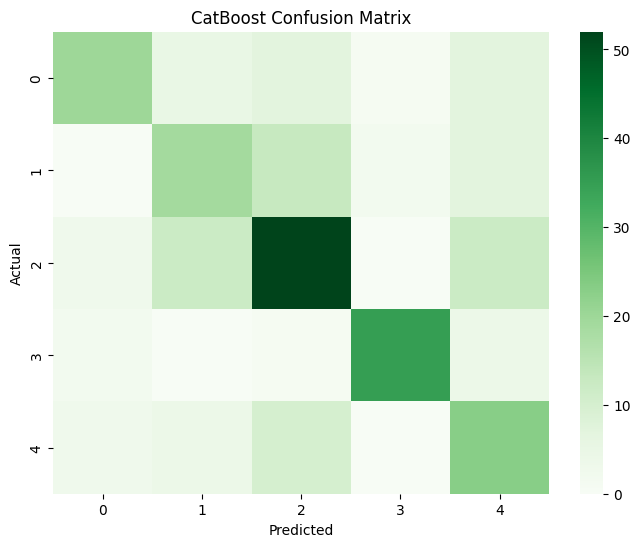

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
)
from sklearn.svm import SVC
from catboost import CatBoostClassifier

# ============================================
# LOAD ORIGINAL AND CLUSTERED DATA

original_df = pd.read_csv("../Dataset/processed_file.csv")
clustered_df = pd.read_csv("../Dataset/clustered_data_k6.csv")  # Make sure this path matches your file location

# Add Cluster column
original_df["Cluster"] = clustered_df["Cluster"]

# Fix missing values by filling with median (recommended for numeric features)
original_df = original_df.fillna(original_df.median(numeric_only=True))

# ============================================
# FEATURE ENGINEERING & PREPROCESSING

# One-hot encode 'brand'
X = original_df[['brand']].copy()
X = pd.get_dummies(X, columns=['brand'])

# Add binary columns (notable effects + skin types)
notable_effects_columns = [col for col in original_df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = original_df[notable_effects_columns + skin_type_columns]

# Add cluster as a feature
X["Cluster"] = original_df["Cluster"]

# Optionally, add price
X["price_SAR"] = original_df["price_SAR"]

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Extract target labels (product types)
product_type_columns = [col for col in original_df.columns if col.startswith('product_type_')]
y = original_df[product_type_columns].values.argmax(axis=1)

# ============================================
# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ============================================
# CATBOOST CLASSIFIER

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)

# Evaluate CatBoost
print("=== CatBoost Results ===")
print(classification_report(y_test, cat_preds))
cat_accuracy = accuracy_score(y_test, cat_preds)
print(f"CatBoost Accuracy: {cat_accuracy:.2f}")

# Confusion Matrix for CatBoost
cm_cat = confusion_matrix(y_test, cat_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cat, annot=False, fmt='d', cmap='Greens')
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the trained model
cat_model.save_model("catboost_model.cbm")

## References  
[1] GeeksforGeeks, “Support Vector Machine Algorithm,” GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/support-vector-machine-algorithm/.

[2] TechTarget, “Support Vector Machine (SVM),” TechTarget, [Online]. Available: https://www.techtarget.com/whatis/definition/support-vector-machine-SVM. 

[3] Yandex, “CatBoost: Yandex’s machine learning algorithm,” Yandex, [Online]. Available: https://catboost.ai/.

[4] A. Kolli, “Understanding CatBoost: The gradient boosting algorithm for categorical data,” Medium, [Online]. Available: https://aravindkolli.medium.com/understanding-catboost-the-gradient-boosting-algorithm-for-categorical-data-73ddb200895d.

